In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [4]:
rng = np.random.default_rng(seed=42)
m = 20 
x = 3 * rng.random((m, 1))
y = 1 + 0.5 * x + rng.standard_normal((m, 1)) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

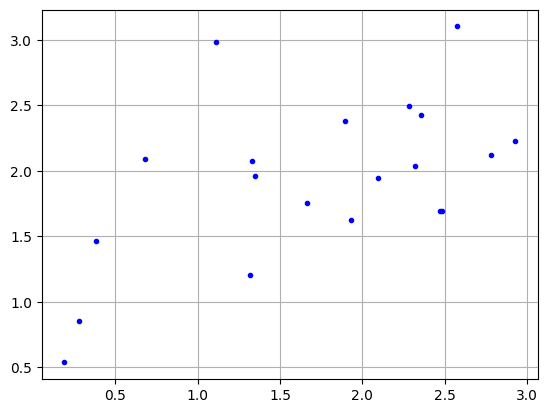

In [5]:
plt.plot(x , y , "b.")
plt.grid()


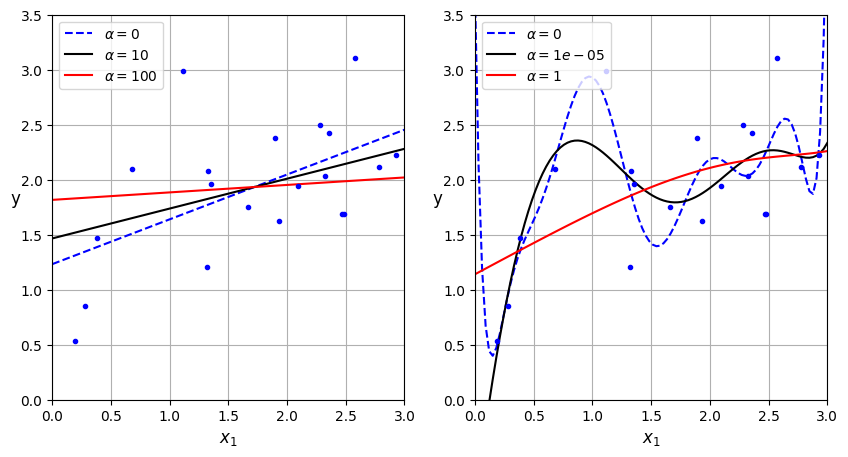

In [24]:
def generate_ridge_plots(alphas , x , y , colors , is_poly=False):
       
    new_data = np.linspace(0 , 3 , 100).reshape(100 , 1)
    for (alpha  , color) in zip(alphas , colors):
        
        if is_poly:
            poly_features = PolynomialFeatures(degree = 10 , include_bias=False)
            ridge_poly_pipeline = make_pipeline(poly_features , StandardScaler() , Ridge(alpha = alpha , solver = "cholesky"))
            ridge_poly_pipeline.fit(x , y)
        
        else:
            ridge_poly_pipeline = make_pipeline(StandardScaler() ,  Ridge(alpha = alpha , solver="cholesky"))
            ridge_poly_pipeline.fit(x , y)
     
        y_pred = ridge_poly_pipeline.predict(new_data)
        
        plt.plot(new_data , y_pred , color , label = fr"$\alpha = {alpha}$")
        
    plt.plot(x , y , "b.")
    plt.grid()
    plt.axis([0. , 3. , 0. , 3.5]) 
    plt.legend(loc="upper left")
    plt.ylabel("y" , fontsize=12 , rotation=0)
    plt.xlabel("$x_1$" , fontsize=12)
    
fig , axes = plt.subplots(ncols=2 , nrows=1 , figsize=(10,5))

plt.sca(axes[0,])
generate_ridge_plots([0 , 10 , 100] , x , y,
                     ["b--" , "k-" , "r-"])

plt.sca(axes[1,])
generate_ridge_plots([0 , 10**-5 , 1] , x , y,
                     ["b--" , "k-" , "r-"] , is_poly=True)

<h3>RIDGE REGRESSION CLOSED FORM</h3><br><br>




$ \hat{\theta} = (X ^ {T}X + \alpha I ) ^ {-1} X ^ {T} y $

In [27]:
#using stochastic gradient descent

sdg_reg = SGDRegressor(penalty="l2" , alpha=0.1/m , tol=None , 
                       max_iter=1000 , eta0=0.01 , random_state=42)

In [28]:
sdg_reg.fit( x , y.ravel())

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.005
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",None
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [31]:
root_mean_squared_error(sdg_reg.predict(x) , y)

0.5108957922644157

In [32]:
#lasso

#uses l1 norm for regularization

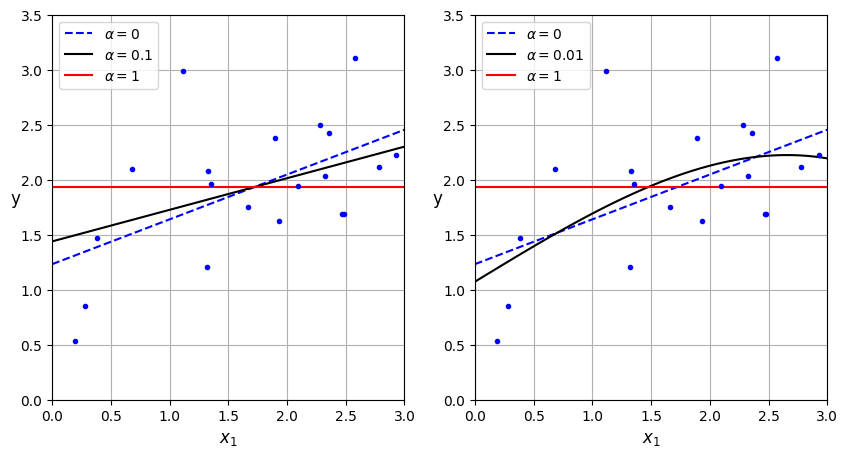

In [44]:
def generate_lasso_plots(alphas , x , y , colors , is_poly=False):
       
    new_data = np.linspace(0 , 3 , 100).reshape(100 , 1)
    for (alpha  , color) in zip(alphas , colors):
        
        
        if alpha == 0:
            lasso_pipeline = make_pipeline(StandardScaler() , LinearRegression())
            lasso_pipeline.fit(x , y)
        
        elif  is_poly:
            poly_features = PolynomialFeatures(degree = 10 , include_bias=False)
            lasso_pipeline = make_pipeline(poly_features , StandardScaler() , Lasso(alpha = alpha ))
            lasso_pipeline.fit(x , y)
            
            
        else:
            lasso_pipeline = make_pipeline(StandardScaler() ,  Lasso(alpha = alpha ))
            lasso_pipeline.fit(x , y)
     
        y_pred = lasso_pipeline.predict(new_data)
        
        plt.plot(new_data , y_pred , color , label = fr"$\alpha = {alpha}$")
        
    plt.plot(x , y , "b.")
    plt.grid()
    plt.axis([0. , 3. , 0. , 3.5]) 
    plt.legend(loc="upper left")
    plt.ylabel("y" , fontsize=12 , rotation=0)
    plt.xlabel("$x_1$" , fontsize=12)
    
fig , axes = plt.subplots(ncols=2 , nrows=1 , figsize=(10,5))

plt.sca(axes[0,])
generate_lasso_plots([0 , 0.1 , 1] , x , y,
                     ["b--" , "k-" , "r-"])

plt.sca(axes[1,])
generate_lasso_plots([0 , 1e-2 , 1] , x , y,
                     ["b--" , "k-" , "r-"] , is_poly=True)